In [40]:
import matplotlib.pyplot as plt
import pandas as pd

import statbotics

%matplotlib notebook

In [2]:
sb = statbotics.Statbotics()

In [10]:
all_teams = sb.get_team_years(year=2023, limit=10000)
len(all_teams)

3286

In [21]:
champ_teams = sb.get_team_events(event="2023cmptx", limit=10000)
champ_team_nums = [t["team"] for t in champ_teams]
champ_team_nums += [333, 449, 2337, 4779, 4976, 5123, 999, 7174, 7534, 8013, 9152, 9244]

print(len(set(champ_team_nums)))

619


In [27]:
teams_df = pd.DataFrame([
    {  
        "team": x["team"],
        "state": x["state"],
        "district": x["district"],
        "country": x["country"],
        "epa": x["epa_end"],
        "champs": x["team"] in champ_team_nums
    }
    for x in all_teams
])

teams_df

,team,state,district,country,epa,champs
0,1,MI,fim,USA,33.39,False
1,4,CA,None,USA,27.46,True
2,8,CA,None,USA,41.32,False
3,11,NJ,fma,USA,50.61,True
4,16,AR,None,USA,50.73,True
...,...,...,...,...,...,...
3281,9312,MI,fim,USA,52.94,True
3282,9313,FL,None,USA,14.28,False
3283,9314,ID,None,USA,15.71,False
3284,9315,SC,pch,USA,8.97,False


<IPython.core.display.Javascript object>


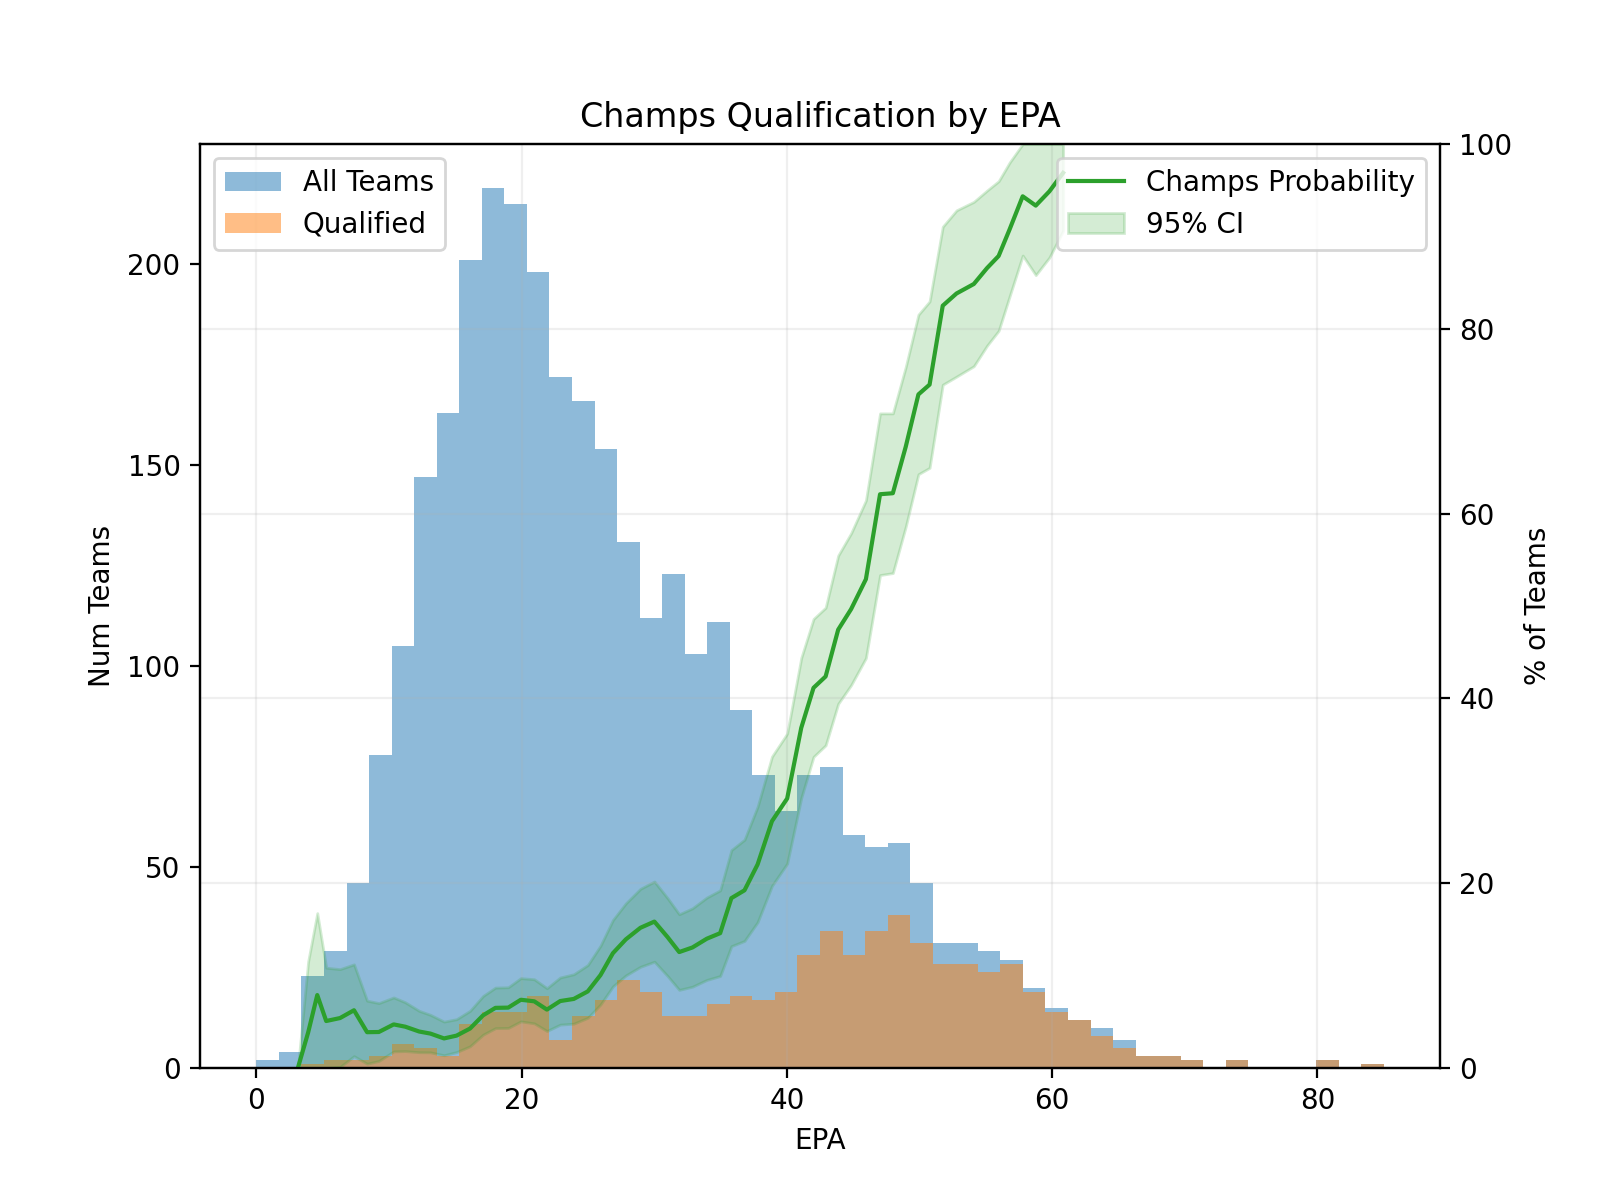

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))

# curr_teams_df = teams_df[teams_df.state == "CA"]
curr_teams_df = teams_df

ax.hist(curr_teams_df.epa, bins=50, alpha=0.5, range=(0, 85), label="All Teams")
ax.hist(curr_teams_df[teams_df.champs].epa, bins=50, alpha=0.5, range=(0, 85), label="Qualified")

epas_x = []
epas = []
epas_lower = []
epas_upper = []
for i in range(60):
    curr_teams = curr_teams_df[(teams_df.epa > i) & (teams_df.epa < i + 4)]
    if len(curr_teams) < 2:
        continue
        
    mean = 100 * curr_teams.champs.mean()
    mean_std = 100 * curr_teams.champs.std() / curr_teams.shape[0] ** 0.5
    epas.append(mean)
    epas_lower.append(max(0, mean - 2 * mean_std))
    epas_upper.append(min(100, mean + 2 * mean_std))
    epas_x.append(curr_teams.epa.mean())
    
ax2 = ax.twinx()
ax2.set_ylim(0, 100)
ax2.plot(epas_x, epas, color="tab:green", label="Champs Probability")
ax2.fill_between(epas_x, epas_lower, epas_upper, color="tab:green", alpha=0.2, label="95% CI")
ax.grid(alpha=0.2, axis="x")
ax2.grid(alpha=0.2, axis="y")

ax.set_xlabel("EPA")
ax.set_ylabel("Num Teams")
ax2.set_ylabel("% of Teams")
ax.set_title("Champs Qualification by EPA")

ax.legend(loc="upper left")
ax2.legend(loc="upper right")
fig.show()